In [50]:
import pandas
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [51]:
# Загружаем данные
train = pandas.read_csv('features.csv', index_col='match_id')
test = pandas.read_csv('features_test.csv', index_col='match_id')
# Смотрим данных
train.head(10)

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63
5,1430284186,1,11,5,1961,1461,19,0,1,6,...,4,4,0,-43.0,1453,0,512,2038,0,63
8,1430293701,1,8,3,967,1136,7,1,0,8,...,6,3,0,10.0,1968,0,1536,1983,12,63
9,1430299335,7,35,5,2117,1252,16,0,0,6,...,3,4,0,-15.0,4079,1,1540,0,63,0
11,1430308974,1,17,5,1527,906,10,0,1,7,...,3,4,0,26.0,3071,0,0,1572,0,63


In [52]:
# Выводим процент пропусков
rows = len(train)
counts = train.describe().T['count']
counts_na = counts[counts < rows]
counts_na.sort_values().apply(lambda c: (rows - c) / rows)

first_blood_player2            0.452402
radiant_flying_courier_time    0.282619
dire_flying_courier_time       0.268415
first_blood_time               0.201100
first_blood_team               0.201100
first_blood_player1            0.201100
dire_bottle_time               0.166029
radiant_bottle_time            0.161380
radiant_first_ward_time        0.018883
dire_first_ward_time           0.018780
radiant_courier_time           0.007117
dire_courier_time              0.006953
Name: count, dtype: float64

In [53]:
# Удаляем признаки, связанные с итогами матча
train.drop(['duration', 
         'tower_status_radiant', 
         'tower_status_dire', 
         'barracks_status_radiant', 
         'barracks_status_dire'
        ], axis=1, inplace=True)

# Разделяем датасет на признаки и целевую переменную
_X = train
_y = train['radiant_win'].to_frame()
del train['radiant_win']

In [55]:
X, X_test = _X.fillna(0), train.fillna(0) # Заменяем пропуски на 0

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

# Обучаем градиентным бустингом
scores = []
nums = [10, 20, 30, 50, 70, 100, 150]
for n in nums:
    print('#', str(n))
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print('Time elapsed:', datetime.datetime.now() - start_time)
    print(model_scores)
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:23.306600
[0.66383799 0.66635457 0.66360048 0.66529818 0.66516222]
# 20
Time elapsed: 0:00:37.117014
[0.68083889 0.68272733 0.67969876 0.6834932  0.6855512 ]
# 30
Time elapsed: 0:00:50.716179
[0.68892093 0.68934663 0.68712298 0.69180598 0.69283583]
# 50
Time elapsed: 0:01:22.799230
[0.69627399 0.69747879 0.69470891 0.69921915 0.69979097]
# 70
Time elapsed: 0:01:52.615075
[0.70120426 0.7018134  0.699683   0.70399032 0.70389172]
# 100
Time elapsed: 0:02:44.480190
[0.70515496 0.706077   0.70429951 0.7074682  0.70811523]
# 150
Time elapsed: 0:03:54.557510
[0.70866295 0.7102523  0.7096522  0.71157824 0.71220809]


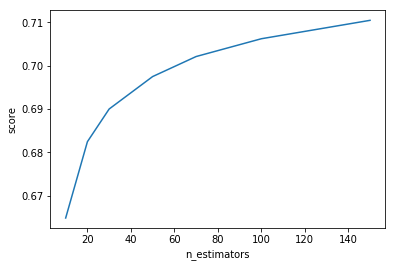

In [56]:
# Строим график
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

C = 1e-05
[0.6931532  0.69481539 0.69571379 0.69513159 0.69699445]
Time elapsed: 0:00:10.514798
C = 0.0001
[0.70956686 0.71039474 0.71170336 0.71176082 0.71336295]
Time elapsed: 0:00:10.107712
C = 0.001
[0.71449541 0.71577214 0.71625974 0.71697301 0.71831738]
Time elapsed: 0:00:11.734264
C = 0.01
[0.71464598 0.71617915 0.71624749 0.71735041 0.71832832]
Time elapsed: 0:00:13.297577
C = 0.1
[0.71462192 0.71617479 0.71619187 0.71737596 0.7182712 ]
Time elapsed: 0:00:13.467907
C = 1.0
[0.71461815 0.71617185 0.71618338 0.7173762  0.71826341]
Time elapsed: 0:00:13.500093
C = 10.0
[0.71461695 0.71617179 0.71618281 0.71737669 0.7182632 ]
Time elapsed: 0:00:13.531364
C = 100.0
[0.71461692 0.71617206 0.71618249 0.71737655 0.71826345]
Time elapsed: 0:00:13.440243
C = 1000.0
[0.71461693 0.71617214 0.7161825  0.71737659 0.71826346]
Time elapsed: 0:00:13.916703
C = 10000.0
[0.71461693 0.71617215 0.71618251 0.7173766  0.71826345]
Time elapsed: 0:00:13.315560
C = 100000.0
[0.71461693 0.71617215 0.7161

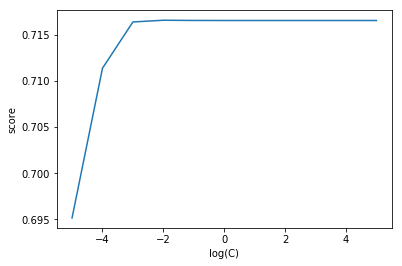

In [57]:
X, X_test = _X.fillna(0), train.fillna(0) # Заменяем пропуски на 0

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

scaler = StandardScaler()
X = scaler.fit_transform(X)


def plot_C_scores(C_pow_range, scores): # Функция, выводящая график
    plt.plot(C_pow_range, scores)
    plt.xlabel('log(C)')
    plt.ylabel('score')
    plt.show()

def test_model_C(X, y, C): # Функция, обучающая одну модель
    print('C =', str(C))
    model = LogisticRegression(C=C, random_state=42, n_jobs=-1)
    return cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    
def test_model(X, y): # Функция, обучающая модели с разным параметром регуляризации
    scores = []
    C_pow_range = range(-5, 6)
    C_range = [10.0 ** i for i in C_pow_range]
    for C in C_range:
        start_time = datetime.datetime.now()
        model_scores = test_model_C(X, y, C) # Обучаем модель
        print(model_scores)
        print('Time elapsed:', datetime.datetime.now() - start_time)
        scores.append(np.mean(model_scores))

    plot_C_scores(C_pow_range, scores) # Выводим график
    
    max_score = max(scores)
    max_score_index = scores.index(max_score)
    return C_range[max_score_index], max_score



C, score = test_model(X, y) # Обучаем логистической регрессией

In [58]:
print(C) # Выводим параметр регуляризации
print(score) # Выводим качество  

0.01
0.7165502697259141


In [59]:
# Функция, удаляющая категориальные признаки
def clean_category(X):
    X = clean(X)
    del X['lobby_type']
    for n in range(1, 6):
        del X['r{}_hero'.format(n)]
        del X['d{}_hero'.format(n)]

    return X

X, X_test = clean_category(_X), clean_category(train) # Удаляем категориальные признаки в данных
scaler = StandardScaler()
X = scaler.fit_transform(X)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C = 1e-05
[0.69301063 0.69476367 0.69562225 0.69507488 0.69702952]
Time elapsed: 0:00:10.143222
C = 0.0001
[0.70936502 0.71042199 0.71168956 0.71168269 0.71353648]
Time elapsed: 0:00:10.922208
C = 0.001
[0.71434804 0.71581532 0.71629769 0.7168852  0.71853275]
Time elapsed: 0:00:12.142668
C = 0.01
[0.71450425 0.71622052 0.71627999 0.71725088 0.71854131]
Time elapsed: 0:00:12.163612
C = 0.1
[0.71448206 0.71620992 0.71622569 0.71726917 0.71848436]
Time elapsed: 0:00:12.647304
C = 1.0
[0.71447768 0.71620627 0.7162209  0.71727019 0.71847678]
Time elapsed: 0:00:12.546761
C = 10.0
[0.71447669 0.71620645 0.71621968 0.71727123 0.71847581]
Time elapsed: 0:00:12.562928
C = 100.0
[0.7144767  0.71620624 0.71621963 0.71727119 0.71847569]
Time elapsed: 0:00:13.110681
C = 1000.0
[0.71447667 0.71620624 0.71621965 0.71727119 0.71847569]
Time elapsed: 0:00:12.724531
C = 10000.0
[0.71447668 0.71620627 0.71621961 0.71727117 0.71847569]
Time elapsed: 0:00:12.621123
C = 100000.0
[0.71447668 0.71620627 0.7162

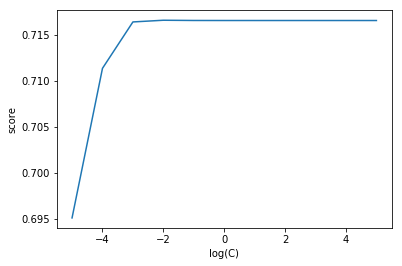

In [60]:
C, score = test_model(X, y) # Обучаем логистической регрессией

In [61]:
print(C) # Выводим параметр регуляризации
print(score) # Выводим качество  

0.01
0.7165593885630225


In [62]:
heroes = pandas.read_csv('heroes.csv')
print('Всего героев в игре:', len(heroes)) # Выводим количество идентификаторов героев

Всего героев в игре: 112


D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


C = 1e-05
[0.69720207 0.69884021 0.69957686 0.69934071 0.70112123]
Time elapsed: 0:00:10.385110
C = 0.0001
[0.72359118 0.72409682 0.72469067 0.72599494 0.72698389]
Time elapsed: 0:00:10.877469
C = 0.001
[0.74465332 0.74667772 0.74413152 0.74880233 0.74740586]
Time elapsed: 0:00:12.950514
C = 0.01
[0.74947407 0.75279102 0.7492512  0.75538896 0.75178335]
Time elapsed: 0:00:16.578292
C = 0.1
[0.74943218 0.75315601 0.74950643 0.7559819  0.75166068]
Time elapsed: 0:00:19.806918
C = 1.0
[0.74936295 0.75316822 0.74949775 0.75602112 0.75158796]
Time elapsed: 0:00:19.861342
C = 10.0
[0.74935121 0.75317095 0.74949831 0.75602517 0.75158   ]
Time elapsed: 0:00:19.975387
C = 100.0
[0.74935011 0.75317056 0.74949869 0.75602547 0.75157877]
Time elapsed: 0:00:19.762929
C = 1000.0
[0.74934946 0.75317052 0.74949877 0.75602565 0.75157867]
Time elapsed: 0:00:20.734379
C = 10000.0
[0.74934982 0.75317055 0.74949872 0.75602524 0.7515786 ]
Time elapsed: 0:00:19.709050
C = 100000.0
[0.74935058 0.7531704  0.7494

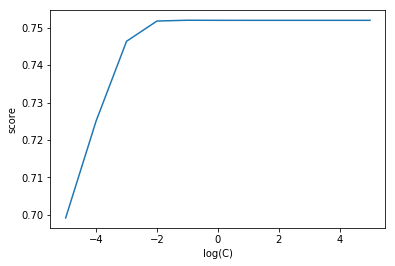

In [63]:
# Функция, формирующая "мешок слов" по героям
def hero_bag(X):
    X_pick = np.zeros((X.shape[0], len(heroes)))
    for i, match_id in enumerate(X.index):
        for p in range(5):
            X_pick[i, X.ix[match_id, 'r%d_hero' % (p+1)]-1] = 1
            X_pick[i, X.ix[match_id, 'd%d_hero' % (p+1)]-1] = -1

    return pandas.DataFrame(X_pick, index=X.index)


X, X_test = clean_category(_X), clean_category(train)
Xh, Xh_test = hero_bag(_X), hero_bag(train) # Формируем "мешок слов" по героям

scaler = StandardScaler()
X = pandas.DataFrame(scaler.fit_transform(X), index = X.index)
X_test = pandas.DataFrame(scaler.transform(X_test), index = X_test.index)

X = pandas.concat([X, Xh], axis=1)
X_test = pandas.concat([X_test, Xh_test], axis=1)

kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

C, score = test_model(X, y) # Обучаем логистической регрессией

In [64]:
print(C) # Выводим параметр регуляризации
print(score) # Выводим качество  

0.1
0.7519474413465284


In [65]:
model = LogisticRegression(C=0.1, random_state=42, n_jobs=-1) # Обучаем лучшую модель
model.fit(X, y)

D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\linear_model\logistic.py:1228: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = -1.
  " = {}.".format(self.n_jobs))


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=-1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [66]:
model.predict(X_test) # Тестируем ее на тестовых данных

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)